# Brain Strock Prediction

importing libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\ajadh\Desktop\healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.shape

(5110, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Drop ID

In [9]:
Id=data["id"]
Id

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [10]:
data=data.drop(["id"],axis=1)
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Missing value Treatment

In [11]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data.bmi=data.bmi.fillna(data.bmi.mean()) # replacing the missing values by mean in bmi column

In [13]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Datatypes conversion 

In [14]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [16]:
data.gender=le.fit_transform(data.gender)

In [17]:
data.gender.value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [18]:
data.ever_married=le.fit_transform(data.ever_married)

In [19]:
data.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [20]:
data.work_type=le.fit_transform(data.work_type)

In [21]:
data.work_type.value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [22]:
data.Residence_type=le.fit_transform(data.Residence_type)

In [23]:
data.Residence_type.value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [24]:
data.smoking_status=le.fit_transform(data.smoking_status)

In [25]:
data.smoking_status.value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [26]:
data.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

# separation of data into dependent & independent columns

In [27]:
train_x=data.iloc[:,0:10]
train_y=data.iloc[:,-1]

In [28]:
train_x.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [29]:
train_y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# Preparing the Data for the Model

In [30]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=100)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4088, 10), (1022, 10), (4088,), (1022,))

In [32]:
x_train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1098,0,77.0,0,0,1,2,0,75.06,22.0,0
3465,0,28.0,0,0,1,2,0,141.16,36.7,2
3160,0,17.0,0,0,0,2,0,88.65,30.3,2
3594,0,62.0,0,0,1,2,0,226.38,47.4,2
1249,1,15.0,0,0,0,2,0,78.59,25.1,0


In [33]:
x_test.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2918,0,63.0,0,1,1,3,0,239.95,32.2,3
3056,1,62.0,0,1,1,0,0,73.70,26.2,2
4916,1,54.0,0,0,1,0,1,72.96,37.7,3
4003,0,24.0,0,0,0,2,0,147.74,21.4,0
3332,1,27.0,0,0,1,2,1,114.32,28.1,0


In [34]:
y_train.head(5)

1098    0
3465    0
3160    0
3594    0
1249    0
Name: stroke, dtype: int64

In [35]:
y_test.head(5)

2918    0
3056    0
4916    0
4003    0
3332    0
Name: stroke, dtype: int64

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
lg.fit(x_train,y_train)

LogisticRegression()

In [39]:
lg_p=lg.predict(x_test)

In [40]:
lg_pr=precision_score(lg_p,y_test)
lg_pr

0.0

In [41]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.0

In [42]:
lg_ac=accuracy_score(lg_p,y_test)
lg_ac

0.9549902152641878

In [43]:
lg_f1=f1_score(lg_p,y_test)
lg_f1

0.0

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
lg_cf=confusion_matrix(lg_p,y_test)
lg_cf

array([[976,  46],
       [  0,   0]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.98      1022



# Decision tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
dt_p=dt.predict(x_test)

In [51]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

0.10869565217391304

In [52]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.0847457627118644

In [53]:
dt_ac=accuracy_score(dt_p,y_test)
dt_ac

0.9070450097847358

In [54]:
dt_f1=f1_score(dt_p,y_test)
dt_f1

0.09523809523809523

In [55]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[922,  41],
       [ 54,   5]], dtype=int64)

In [56]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

90.70450097847358

In [57]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       963
           1       0.11      0.08      0.10        59

    accuracy                           0.91      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.90      0.91      0.90      1022



# Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
rf_p=rf.predict(x_test)

In [61]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[975,  46],
       [  1,   0]], dtype=int64)

In [62]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

95.40117416829746

In [63]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1021
           1       0.00      0.00      0.00         1

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.98      1022



In [64]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.0

In [65]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.0

In [66]:
rf_ac=accuracy_score(rf_p,y_test)
rf_ac

0.9540117416829745

In [67]:
rf_f1=f1_score(rf_p,y_test)
rf_f1

0.0

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [69]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [70]:
k_p=knn.predict(x_test)


In [71]:
k_cf=confusion_matrix(k_p,y_test)
k_cf

array([[976,  46],
       [  0,   0]], dtype=int64)

In [72]:
k_acc=k_cf.diagonal().sum()/k_cf.sum()*100
k_acc

95.49902152641879

In [73]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.98      1022



In [74]:
k_pr=precision_score(k_p,y_test)
k_pr

0.0

In [75]:
k_re=recall_score(k_p,y_test)
k_re

0.0

In [76]:
k_ac=accuracy_score(k_p,y_test)
k_ac

0.9549902152641878

In [77]:
k_f1=f1_score(k_p,y_test)
k_f1

0.0

In [78]:
lst=list()

In [79]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

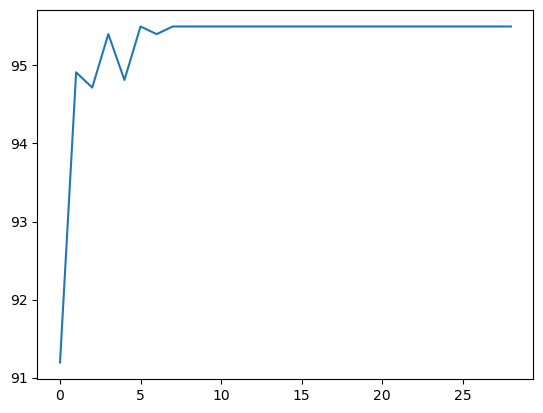

In [80]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# SVM

In [81]:
from sklearn.svm import SVC
svc=SVC()

In [82]:
svc.fit(x_train,y_train)

SVC()

In [83]:
s_p=svc.predict(x_test)
s_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
s_cf=confusion_matrix(s_p,y_test)
s_cf

array([[976,  46],
       [  0,   0]], dtype=int64)

In [85]:
s_acc=s_cf.diagonal().sum()/s_cf.sum()*100
s_acc

95.49902152641879

In [86]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.98      1022



In [87]:
s_pr=precision_score(s_p,y_test)
s_pr

0.0

In [88]:
s_re=recall_score(s_p,y_test)
s_re

0.0

In [89]:
s_ac=accuracy_score(s_p,y_test)
s_ac

0.9549902152641878

In [90]:
s_f1=f1_score(s_p,y_test)
s_f1

0.0

# naive bayes

In [91]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [92]:
nb.fit(x_train,y_train)

MultinomialNB()

In [93]:
n_p=nb.predict(x_test)

In [94]:
nb_cf=confusion_matrix(n_p,y_test)
nb_cf

array([[805,  25],
       [171,  21]], dtype=int64)

In [95]:
n_acc=nb_cf.diagonal().sum()/nb_cf.sum()*100
n_acc

80.82191780821918

In [96]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       830
           1       0.46      0.11      0.18       192

    accuracy                           0.81      1022
   macro avg       0.64      0.54      0.53      1022
weighted avg       0.76      0.81      0.76      1022



In [97]:
nb_pr=precision_score(n_p,y_test)
nb_pr

0.45652173913043476

In [98]:
nb_re=recall_score(n_p,y_test)
nb_re

0.109375

In [99]:
nb_ac=accuracy_score(n_p,y_test)
nb_ac

0.8082191780821918

In [100]:
nb_f1=f1_score(n_p,y_test)
nb_f1

0.1764705882352941

# XGBOOST

In [101]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [102]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
xgb_p=xgb.predict(x_test)

In [104]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[964,  42],
       [ 12,   4]], dtype=int64)

In [105]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100

In [106]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1006
           1       0.09      0.25      0.13        16

    accuracy                           0.95      1022
   macro avg       0.54      0.60      0.55      1022
weighted avg       0.97      0.95      0.96      1022



In [107]:
xgb_pr=precision_score(xgb_p,y_test)
xgb_pr

0.08695652173913043

In [108]:
xgb_re=recall_score(xgb_p,y_test)
xgb_re

0.25

In [109]:
xgb_ac=accuracy_score(xgb_p,y_test)
xgb_ac

0.9471624266144814

In [110]:
xgb_f1=f1_score(xgb_p,y_test)
xgb_f1

0.12903225806451613

# ADABoost

In [111]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [113]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [114]:
ad_p=adbo.predict(x_test)
ad_p

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[929,  40],
       [ 47,   6]], dtype=int64)

In [116]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

91.48727984344423

In [117]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       969
           1       0.13      0.11      0.12        53

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022



In [118]:
ad_pr=precision_score(ad_p,y_test)
ad_pr

0.13043478260869565

In [119]:
ad_re=recall_score(ad_p,y_test)
ad_re

0.11320754716981132

In [120]:
ad_ac=accuracy_score(ad_p,y_test)
ad_ac

0.9148727984344422

In [121]:
ad_f1=f1_score(ad_p,y_test)
ad_f1

0.1212121212121212

In [122]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","ADA BOOST","XGBOOST","KNN","SVM","NAIVEY BAYES"]
list2=[lg_ac,dt_ac,rf_ac,ad_ac,xgb_ac,k_ac,s_ac,nb_ac]
list3=[lg_pr,dt_pr,rf_pr,ad_pr,xgb_pr,k_pr,s_pr,nb_pr]
list4=[lg_re,dt_re,rf_re,ad_re,xgb_re,k_re,s_re,nb_re]
list5=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,k_f1,s_f1,nb_f1]



In [123]:
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df1

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,0.954990,0.000000,0.000000,0.000000
1,DECISION TREE,0.907045,0.108696,0.084746,0.095238
2,RANDOM FOREST,0.954012,0.000000,0.000000,0.000000
3,ADA BOOST,0.914873,0.130435,0.113208,0.121212
4,XGBOOST,0.947162,0.086957,0.250000,0.129032
5,KNN,0.954990,0.000000,0.000000,0.000000
6,SVM,0.954990,0.000000,0.000000,0.000000
7,NAIVEY BAYES,0.808219,0.456522,0.109375,0.176471


In [124]:
#from sklearn.metrics import plot_roc_curve
#xgb_prob=xgb.predict_proba(data)
#xgb_df=pd.DataFrame(xgb_p1)
#xgb_fpr,xgb_tpr,xgb_threshold-roc_curve(y_test, xgb_df.iloc[:,1])
#plt.plot(xgb_fpr,xgb_tpr)
#plt.title('XG Boost')
#plt.xlabel('TPR')
#plt.ylabel('FPR')
#plt.show()

# Classimbalance

# Random over sampling

In [125]:
c_0,c_1=data["stroke"].value_counts()
c_0,c_1

(4861, 249)

In [126]:
train_0=data[data["stroke"]==0]
train_1=data[data["stroke"]==1]

In [127]:
train_0.shape,train_1.shape

((4861, 11), (249, 11))

In [128]:
class_1over=train_1.sample(c_0,replace=True)

In [129]:
class1_0=pd.concat([class_1over,train_0],axis=0)

In [130]:
class1_0.head(5)
#class1_0.shape

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
241,1,57.0,0,0,1,2,0,197.28,34.5,1,1
65,1,78.0,1,0,0,2,1,113.01,24.0,2,1
80,1,59.0,0,0,1,2,0,96.16,44.1,0,1
38,1,58.0,0,0,0,2,0,92.62,32.0,0,1
110,1,79.0,0,1,1,2,0,129.98,22.6,1,1


In [131]:
class1_0.stroke.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

# Outlier Treatment

<AxesSubplot:>

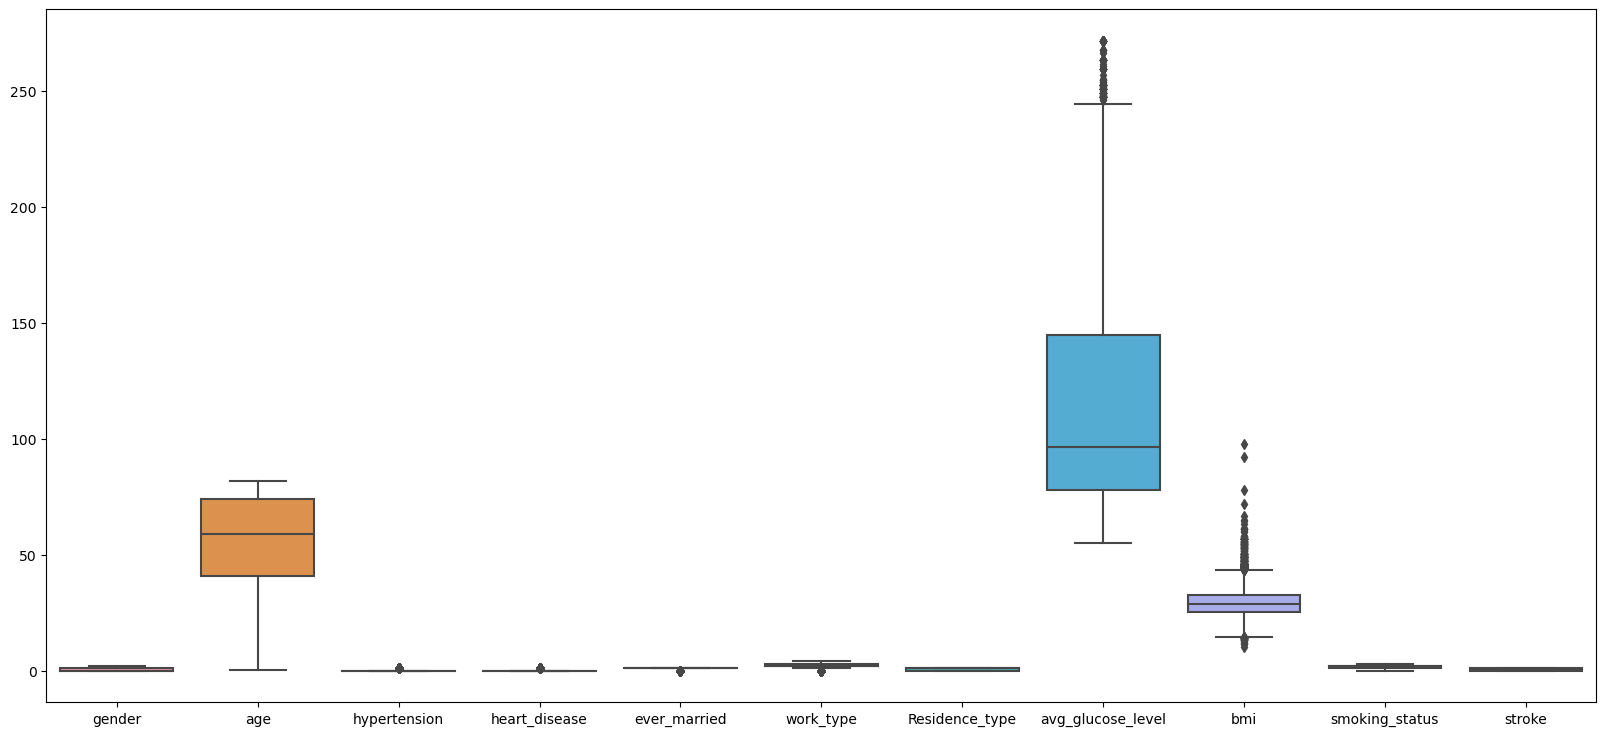

In [132]:
fid=plt.figure(figsize=(20,9))
sns.boxplot(data=class1_0)

In [133]:
#the columns avg_glucose_level ,bmi having the outliers

# Outlier Treatment for avg_glucose_level column

<AxesSubplot:ylabel='avg_glucose_level'>

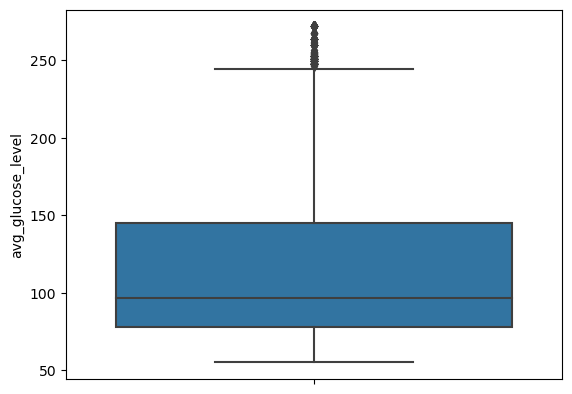

In [134]:
sns.boxplot(data=class1_0,y="avg_glucose_level")

<AxesSubplot:>

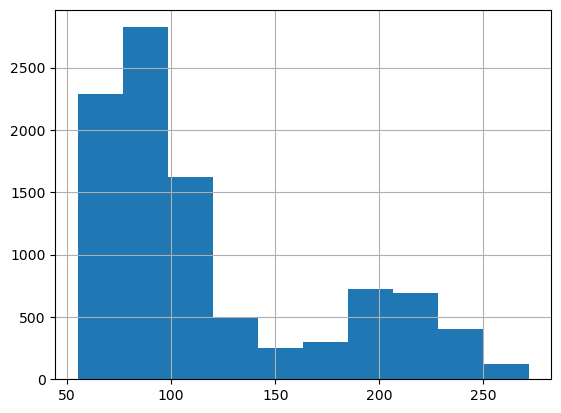

In [135]:
class1_0.avg_glucose_level.hist()

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

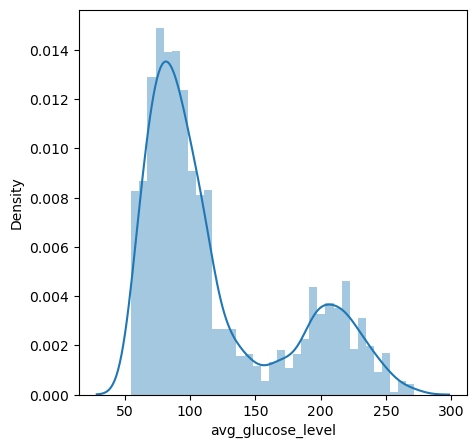

In [136]:
fid=plt.figure(figsize=(5,5)) 
sns.distplot(class1_0.avg_glucose_level)

In [137]:
iqr=class1_0.avg_glucose_level.quantile(0.75)-class1_0.avg_glucose_level.quantile(0.25)
iqr

66.81750000000001

In [138]:
class1_0.avg_glucose_level.describe() # avg_glucose_level is numeric variable

count    9722.000000
mean      118.468403
std        55.254897
min        55.120000
25%        78.082500
50%        96.590000
75%       144.900000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [139]:
class1_0.avg_glucose_level.value_counts()

82.10     35
113.01    33
195.23    31
90.00     29
72.81     28
          ..
88.53      1
239.82     1
58.26      1
75.92      1
85.28      1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [140]:
lb=class1_0["avg_glucose_level"].quantile(0.25)-(iqr*3)
ub=class1_0["avg_glucose_level"].quantile(0.75)+(iqr*3)
print(lb,ub)

-122.37000000000005 345.3525000000001


In [141]:
class1_0.loc[data["avg_glucose_level"]>342.77,"avg_glucose_level"]=342.77

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

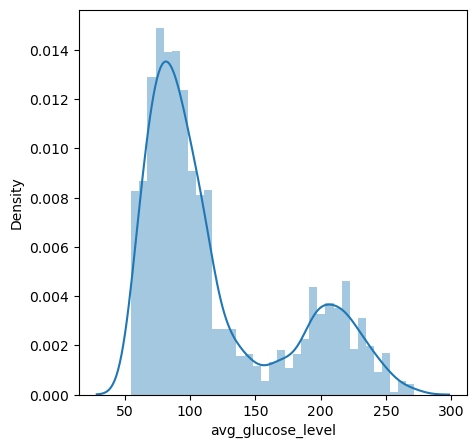

In [142]:
fid=plt.figure(figsize=(5,5))  # Distplot after outlier treatment
sns.distplot(class1_0.avg_glucose_level)

<AxesSubplot:ylabel='bmi'>

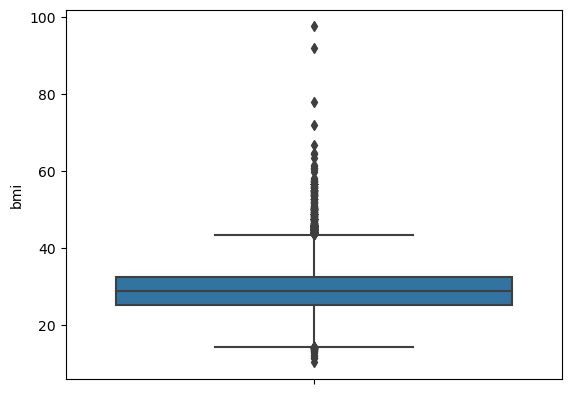

In [143]:
sns.boxplot(data=class1_0,y="bmi")

<AxesSubplot:>

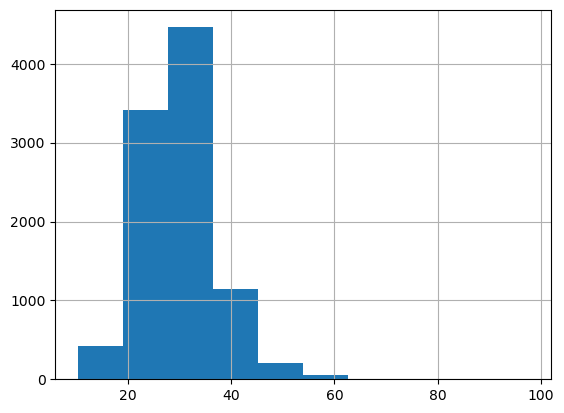

In [144]:
class1_0.bmi.hist()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

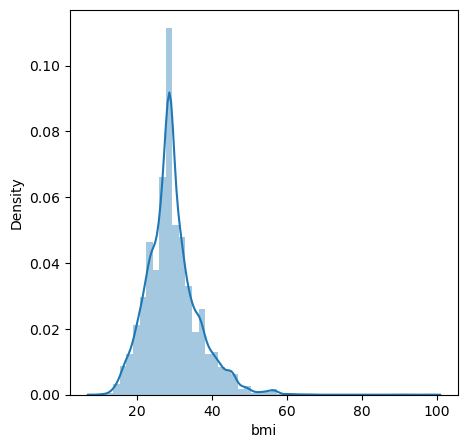

In [145]:
fid=plt.figure(figsize=(5,5)) 
sns.distplot(class1_0.bmi)

In [146]:
iqr=class1_0.bmi.quantile(0.75)-class1_0.bmi.quantile(0.25)
iqr

7.300000000000001

In [147]:
class1_0.bmi.describe()

count    9722.000000
mean       29.511346
std         6.905271
min        10.300000
25%        25.300000
50%        28.893237
75%        32.600000
max        97.600000
Name: bmi, dtype: float64

In [148]:
class1_0.bmi.value_counts()

28.893237    916
24.000000    123
31.400000    120
27.300000    112
28.500000     94
            ... 
12.000000      1
49.400000      1
57.500000      1
11.500000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

In [149]:
lb=class1_0["bmi"].quantile(0.25)-(iqr*3)
ub=class1_0["bmi"].quantile(0.75)+(iqr*3)
print(lb,ub)

3.3999999999999986 54.5


In [150]:
class1_0.loc[class1_0["bmi"]>54.20000000000001,"bmi"]=54.20000000000001

<AxesSubplot:xlabel='bmi', ylabel='Density'>

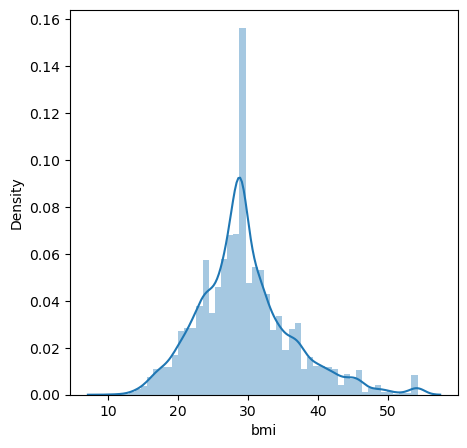

In [151]:
fid=plt.figure(figsize=(5,5))  # Distplot after outlier treatment
sns.distplot(class1_0.bmi)

# Skewness treatment

In [152]:
class1_0.skew()

gender               0.305541
age                 -0.766109
hypertension         1.715023
heart_disease        2.304531
ever_married        -1.218595
work_type           -0.515651
Residence_type      -0.104664
avg_glucose_level    1.033442
bmi                  0.735676
smoking_status      -0.087652
stroke               0.000000
dtype: float64

In [153]:
class1_0.avg_glucose_level.value_counts()

82.10     35
113.01    33
195.23    31
90.00     29
72.81     28
          ..
88.53      1
239.82     1
58.26      1
75.92      1
85.28      1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [154]:
class1_0.loc[data["avg_glucose_level"]==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [155]:
class1_0.avg_glucose_level.skew()

1.0334419052172934

In [156]:
v1=np.log(class1_0.avg_glucose_level)

In [157]:
v1.skew()

0.5816252158196833

In [158]:
class1_0.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
241,1,57.0,0,0,1,2,0,197.28,34.5,1,1
65,1,78.0,1,0,0,2,1,113.01,24.0,2,1
80,1,59.0,0,0,1,2,0,96.16,44.1,0,1
38,1,58.0,0,0,0,2,0,92.62,32.0,0,1
110,1,79.0,0,1,1,2,0,129.98,22.6,1,1


In [159]:
x=class1_0.corr() # To find correlation matrix
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.013869,0.004150,0.146019,0.032816,0.041384,-0.009780,0.115748,0.005581,-0.043246,0.023917
age,0.013869,1.000000,0.266853,0.269509,0.558420,-0.246327,0.018469,0.262296,0.188686,0.174988,0.580515
hypertension,0.004150,0.266853,1.000000,0.082912,0.089516,0.006859,-0.030845,0.152014,0.109439,0.145015,0.225726
heart_disease,0.146019,0.269509,0.082912,1.000000,0.089257,-0.041128,0.021313,0.277740,0.049056,0.092822,0.229727
ever_married,0.032816,0.558420,0.089516,0.089257,1.000000,-0.228511,-0.043454,0.200375,0.264211,0.188681,0.270757
work_type,0.041384,-0.246327,0.006859,-0.041128,-0.228511,1.000000,-0.019124,-0.084945,-0.193996,-0.172346,-0.079824
Residence_type,-0.009780,0.018469,-0.030845,0.021313,-0.043454,-0.019124,1.000000,0.019422,0.023471,-0.008611,0.039758
avg_glucose_level,0.115748,0.262296,0.152014,0.277740,0.200375,-0.084945,0.019422,1.000000,0.244308,0.076336,0.247464
bmi,0.005581,0.188686,0.109439,0.049056,0.264211,-0.193996,0.023471,0.244308,1.000000,0.158526,0.104618
smoking_status,-0.043246,0.174988,0.145015,0.092822,0.188681,-0.172346,-0.008611,0.076336,0.158526,1.000000,0.073309


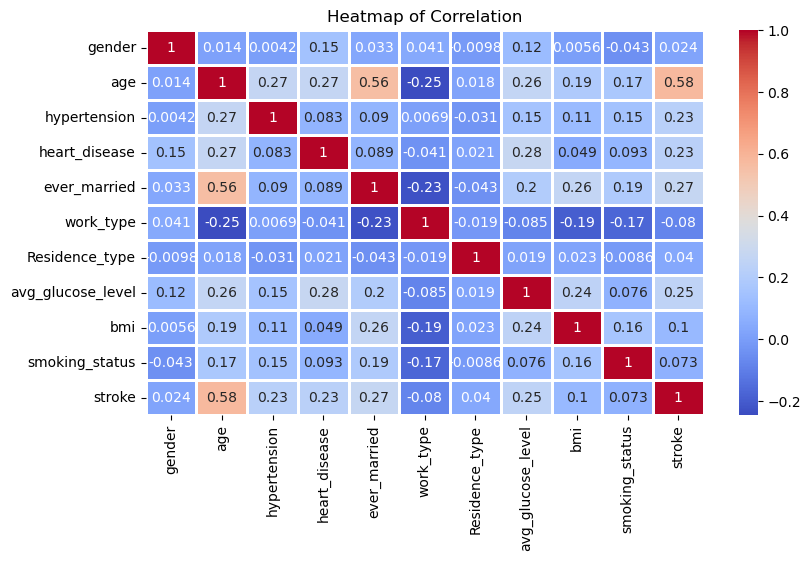

In [273]:
plt.figure(figsize=(9,5))
plt.title("Heatmap of Correlation")
heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap="coolwarm")
plt.show()

# EDA

<AxesSubplot:xlabel='gender', ylabel='count'>

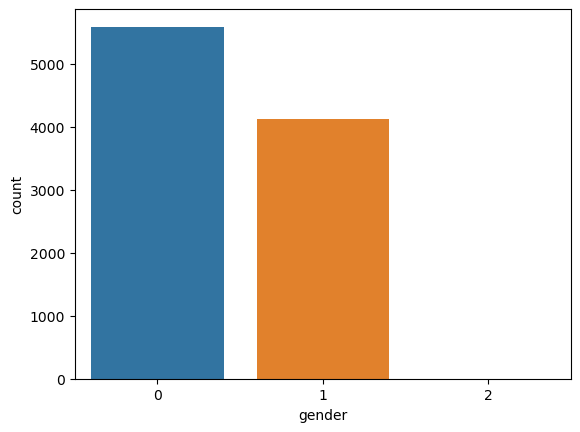

In [161]:
sns.countplot("gender",data=class1_0)

In [162]:
y1=pd.crosstab(class1_0["hypertension"],class1_0["stroke"])

<AxesSubplot:xlabel='hypertension'>

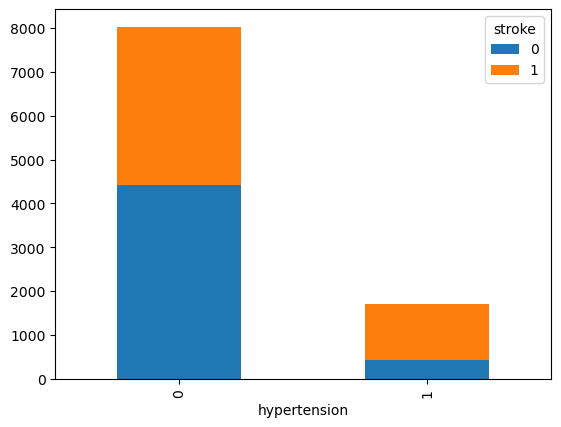

In [163]:
y1.plot(kind="bar",stacked=True)

2    5689
3    2027
0    1262
4     722
1      22
Name: work_type, dtype: int64


<AxesSubplot:xlabel='work_type', ylabel='count'>

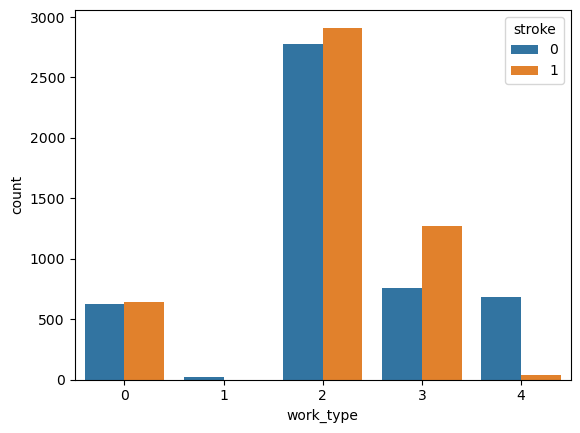

In [164]:
print(class1_0['work_type'].value_counts())
sns.countplot(class1_0['work_type'], hue = class1_0['stroke'])

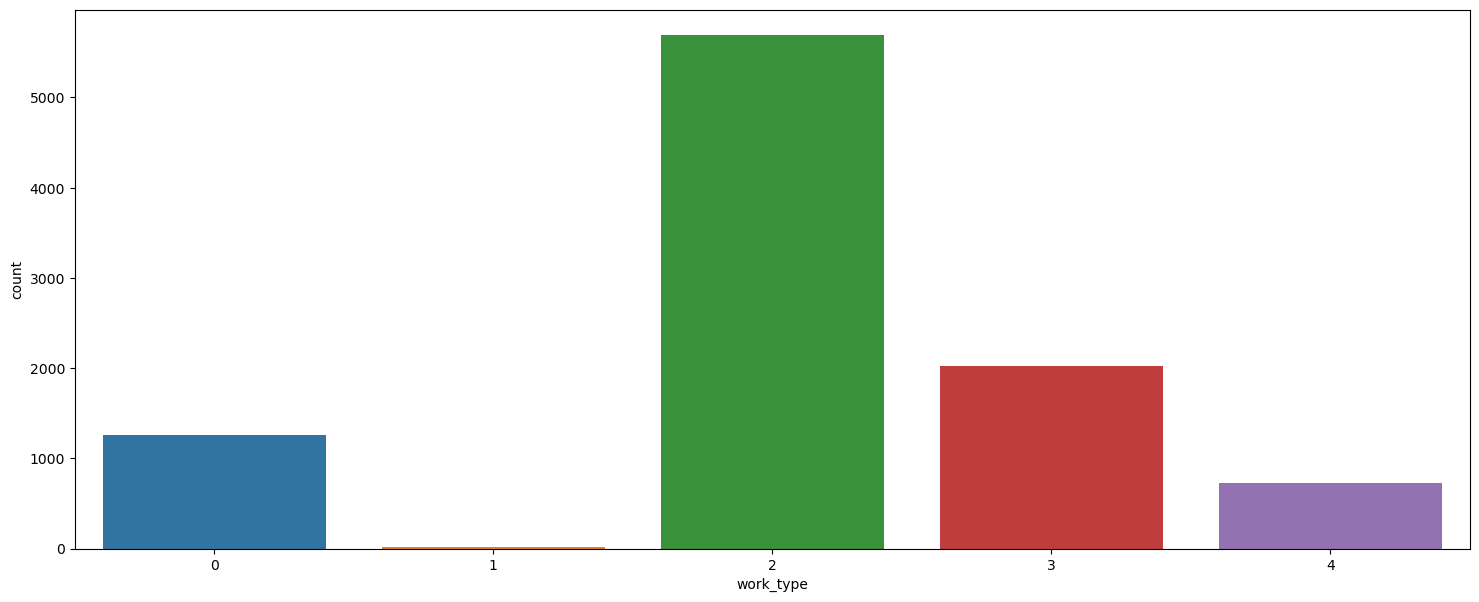

In [165]:
plt.figure(figsize=(18,7))
sns.countplot(class1_0["work_type"])
plt.show()

# RFE=Recursive FS

In [166]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [167]:
rfe=RFE(dTree)

In [168]:
rfe.fit(class1_0.iloc[:,0:10],class1_0.iloc[:,-1])
#rfe.fit(o_x_train,o_y_train)

RFE(estimator=DecisionTreeClassifier())

In [169]:
rfe.support_

array([False,  True, False, False, False,  True, False,  True,  True,
        True])

In [170]:
df3=pd.DataFrame({"Score":list(rfe.support_),"columns":list(class1_0.iloc[:,0:10])})
df3

,Score,columns
0,False,gender
1,True,age
2,False,hypertension
3,False,heart_disease
4,False,ever_married
5,True,work_type
6,False,Residence_type
7,True,avg_glucose_level
8,True,bmi
9,True,smoking_status


In [171]:
df=class1_0.drop(["gender","hypertension","heart_disease","ever_married","Residence_type"],axis=1)

In [172]:
df

,age,work_type,avg_glucose_level,bmi,smoking_status,stroke
241,57.0,2,197.28,34.500000,1,1
65,78.0,2,113.01,24.000000,2,1
80,59.0,2,96.16,44.100000,0,1
38,58.0,2,92.62,32.000000,0,1
110,79.0,2,129.98,22.600000,1,1
...,...,...,...,...,...,...
5105,80.0,2,83.75,28.893237,2,0
5106,81.0,3,125.20,40.000000,2,0
5107,35.0,3,82.99,30.600000,2,0
5108,51.0,2,166.29,25.600000,1,0


In [173]:
from sklearn.model_selection import train_test_split

In [174]:
t_x=df.iloc[:,0:5]
t_y=df.iloc[:,-1]

In [175]:
t_x.head(5)

,age,work_type,avg_glucose_level,bmi,smoking_status
241,57.0,2,197.28,34.5,1
65,78.0,2,113.01,24.0,2
80,59.0,2,96.16,44.1,0
38,58.0,2,92.62,32.0,0
110,79.0,2,129.98,22.6,1


In [176]:
t_y.head(5)

241    1
65     1
80     1
38     1
110    1
Name: stroke, dtype: int64

In [177]:
x5_tr,x5_te,y5_tr,y5_te=train_test_split(t_x,t_y,test_size=0.2,random_state=100)

In [178]:
x5_tr.shape,x5_te.shape,y5_tr.shape,y5_te.shape

((7777, 5), (1945, 5), (7777,), (1945,))

# Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [180]:
lg.fit(x5_tr,y5_tr)

LogisticRegression()

In [181]:
lg_p2=lg.predict(x5_te)

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [183]:
lg_cf1=confusion_matrix(lg_p2,y5_te)
lg_cf1

array([[690, 167],
       [274, 814]], dtype=int64)

In [184]:
acc=lg_cf1.diagonal().sum()/lg_cf1.sum()*100
acc

77.32647814910025

In [185]:
print(classification_report(lg_p2,y5_te))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       857
           1       0.83      0.75      0.79      1088

    accuracy                           0.77      1945
   macro avg       0.77      0.78      0.77      1945
weighted avg       0.78      0.77      0.77      1945



In [186]:
lg_ac2=accuracy_score(lg_p2,y5_te)

In [187]:
lg_pre=precision_score(lg_p2,y5_te)

In [188]:
lg_rec=recall_score(lg_p2,y5_te)

In [189]:
lg_f=f1_score(lg_p2,y5_te)

# Decision Tree

In [190]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [191]:
dt.fit(x5_tr,y5_tr)

DecisionTreeClassifier()

In [192]:
dt_p2=dt.predict(x5_te)

In [193]:
dt_cf1=confusion_matrix(dt_p2,y5_te)
dt_cf1

array([[909,   0],
       [ 55, 981]], dtype=int64)

In [194]:
dt_acc2=dt_cf1.diagonal().sum()/dt_cf1.sum()*100
dt_acc2

97.17223650385604

In [195]:
print(classification_report(dt_p2,y5_te))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       909
           1       1.00      0.95      0.97      1036

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



In [196]:
dt_ac2=accuracy_score(dt_p2,y5_te)

In [197]:
dt_pre=precision_score(dt_p2,y5_te)

In [198]:
dt_rec=recall_score(dt_p2,y5_te)

In [199]:
dt_f=f1_score(dt_p2,y5_te)

# KNN

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [201]:
knn.fit(x5_tr,y5_tr)

KNeighborsClassifier(n_neighbors=7)

In [202]:
k_p2=knn.predict(x5_te)

In [203]:
k_cf1=confusion_matrix(k_p2,y5_te)
k_cf1

array([[782,   0],
       [182, 981]], dtype=int64)

In [204]:
k_acc2=k_cf1.diagonal().sum()/k_cf1.sum()*100
k_acc2

90.64267352185091

In [205]:
print(classification_report(k_p2,y5_te))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       782
           1       1.00      0.84      0.92      1163

    accuracy                           0.91      1945
   macro avg       0.91      0.92      0.91      1945
weighted avg       0.92      0.91      0.91      1945



In [206]:
K_ac2=accuracy_score(k_p2,y5_te)

In [207]:
K_pre=precision_score(k_p2,y5_te)

In [208]:
K_rec=recall_score(k_p2,y5_te)

In [209]:
K_f=f1_score(k_p2,y5_te)

In [210]:
lst=list()

In [211]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x5_tr,y5_tr)
    kn_pred=knn.predict(x5_te)
    cf_k=confusion_matrix(kn_pred,y5_te)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

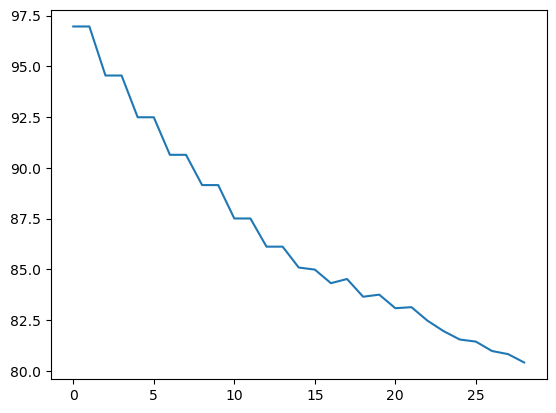

In [212]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# Random forest

In [213]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [214]:
rf.fit(x5_tr,y5_tr)

RandomForestClassifier()

In [215]:
rf_p2=rf.predict(x5_te)
rf_p2

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [216]:
rf_cf1=confusion_matrix(rf_p2,y5_te)
rf_cf1

array([[941,   0],
       [ 23, 981]], dtype=int64)

In [217]:
rf_acc2=rf_cf1.diagonal().sum()/rf_cf1.sum()*100
rf_acc2

98.81748071979435

In [218]:
print(classification_report(rf_p2,y5_te))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       1.00      0.98      0.99      1004

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [219]:
rf_ac2=accuracy_score(rf_p2,y5_te)

In [220]:
rf_pre=precision_score(rf_p2,y5_te)

In [221]:
rf_rec=recall_score(rf_p2,y5_te)

In [222]:
rf_f=f1_score(rf_p2,y5_te)

# ADA Boost

In [223]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [224]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [225]:
adbo.fit(x5_tr,y5_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [226]:
ad_p2=adbo.predict(x5_te)
ad_p2

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [227]:
ad_cf1=confusion_matrix(ad_p2,y5_te)
ad_cf1

array([[912,   0],
       [ 52, 981]], dtype=int64)

In [228]:
ad_acc2=ad_cf1.diagonal().sum()/ad_cf1.sum()*100
ad_acc2

97.32647814910025

In [229]:
print(classification_report(ad_p2,y5_te))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       912
           1       1.00      0.95      0.97      1033

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



In [230]:
adbo_ac2=accuracy_score(ad_p2,y5_te)

In [231]:
adbo_pre=precision_score(ad_p2,y5_te)

In [232]:
adbo_rec=recall_score(ad_p2,y5_te)

In [233]:
adbo_f=f1_score(ad_p2,y5_te)

# XG Boost

In [234]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [235]:
xgb.fit(x5_tr,y5_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [236]:
xgb_p2=xgb.predict(x5_te)
xgb_p2

array([1, 0, 1, ..., 1, 1, 1])

In [237]:
xgb_cf1=confusion_matrix(xgb_p2,y5_te)
xgb_cf1

array([[900,   0],
       [ 64, 981]], dtype=int64)

In [238]:
xgb_acc2=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_acc2

96.70951156812339

In [239]:
print(classification_report(xgb_p2,y5_te))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       900
           1       1.00      0.94      0.97      1045

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



In [240]:
xgb_ac2=accuracy_score(xgb_p2,y5_te)

In [241]:
xgb_pre=precision_score(xgb_p2,y5_te)

In [242]:
xgb_rec=recall_score(xgb_p2,y5_te)

In [243]:
xgb_f=f1_score(xgb_p2,y5_te)

# SVM

In [244]:
from sklearn.svm import SVC
svc=SVC()

In [245]:
svc.fit(x5_tr,y5_tr)

SVC()

In [246]:
s_p2=svc.predict(x5_te)
s_p2

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [247]:
s_cf1=confusion_matrix(s_p2,y5_te)
s_cf1

array([[693, 183],
       [271, 798]], dtype=int64)

In [248]:
s_acc2=s_cf1.diagonal().sum()/s_cf1.sum()*100
s_acc2

76.65809768637533

In [249]:
print(classification_report(s_p2,y5_te))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       876
           1       0.81      0.75      0.78      1069

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



In [250]:
svm_ac2=accuracy_score(s_p2,y5_te)

In [251]:
svm_pre=precision_score(s_p2,y5_te)

In [252]:
svm_rec=recall_score(s_p2,y5_te)

In [253]:
svm_f=f1_score(s_p2,y5_te)

# Naivy Bayes

In [254]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [255]:
nb.fit(x5_tr,y5_tr)

MultinomialNB()

In [256]:
n_p2=nb.predict(x5_te)

In [257]:
n_cf1=confusion_matrix(n_p2,y5_te)


In [258]:
acc_n=n_cf1.diagonal().sum()/n_cf1.sum()*100
acc_n

69.61439588688945

In [259]:
print(classification_report(n_p2,y5_te))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       833
           1       0.77      0.68      0.72      1112

    accuracy                           0.70      1945
   macro avg       0.70      0.70      0.69      1945
weighted avg       0.71      0.70      0.70      1945



In [260]:
nb_ac2=accuracy_score(n_p2,y5_te)

In [261]:
nb_pre=precision_score(n_p2,y5_te)

In [262]:
nb_rec=recall_score(n_p2,y5_te)

In [263]:
nb_f=f1_score(n_p2,y5_te)

In [264]:
list_6=["LOGISTIC REGRESSION","DECISION TREE","KNN","RANDOM FOREST","ADA BOOST","XGBOOST","SVM","NAIVEY BAYES"]
list_7=[lg_ac2,dt_ac2,K_ac2,rf_ac2,adbo_ac2,xgb_ac2,svm_ac2,nb_ac2]
list_8=[lg_pre,dt_pre,K_pre,rf_pre,adbo_pre,xgb_pre,svm_pre,nb_pre]
list_9=[lg_rec,dt_rec,K_rec,rf_rec,adbo_rec,xgb_rec,svm_rec,nb_rec]
list_10=[lg_f,dt_f,K_f,rf_f,adbo_f,xgb_f,svm_f,nb_f]

In [265]:
d2=pd.DataFrame({"Model Name":list_6,"Accuracy":list_7,"Precision":list_8,"Recall":list_9,"F1_score":list_10})
d2

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,0.773265,0.829766,0.748162,0.786854
1,DECISION TREE,0.971722,1.000000,0.946911,0.972732
2,KNN,0.906427,1.000000,0.843508,0.915112
3,RANDOM FOREST,0.988175,1.000000,0.977092,0.988413
4,ADA BOOST,0.973265,1.000000,0.949661,0.974181
5,XGBOOST,0.967095,1.000000,0.938756,0.968411
6,SVM,0.766581,0.813456,0.746492,0.778537
7,NAIVEY BAYES,0.696144,0.765545,0.675360,0.717630
